In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set
np.set_printoptions(precision = 5)

ModuleNotFoundError: No module named 'numpy'

In [ ]:
from google.colab import files
dataset = files.upload()

Saving Data.xlsx to Data.xlsx


In [ ]:
dataset = pd.DataFrame(pd.read_excel("Data.xlsx"))
dataset.head()

,PLAYER,Mat,Inns,NO,2018_Runs,HS,Avg,BF,SR,100,50,4s,6s,2019_Runs
0,Aaron Finch,10,9,1,134,46,16.75,100,134.00,0,0,6,8,160
1,AB de Villiers,12,11,2,480,90*,53.33,275,174.54,0,6,39,30,424
2,Abhishek Sharma,3,3,2,63,46*,63,33,190.90,0,0,3,5,63
3,Ajinkya Rahane,15,14,1,370,65*,28.46,313,118.21,0,1,39,5,396
4,Alex Hales,6,6,0,148,45,24.66,118,125.42,0,0,13,6,165


**`Checking for Nan or Null values in the dataset`**

In [ ]:
dataset.isna().sum()

PLAYER       0
Mat          0
Inns         0
NO           0
2018_Runs    0
HS           0
Avg          0
BF           0
SR           0
100          0
50           0
4s           0
6s           0
2019_Runs    0
dtype: int64

In [ ]:
dataset.describe()

,Mat,Inns,NO,2018_Runs,BF,SR,100,50,4s,6s,2019_Runs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0000
mean,10.420000,8.600000,1.790000,189.260000,135.890000,133.162000,0.050000,1.010000,16.390000,8.680000,184.2600
std,4.472542,4.572646,1.683521,182.454235,123.063414,33.044126,0.261116,1.642215,17.852875,9.382856,173.3093
min,1.000000,1.000000,0.000000,13.000000,5.000000,71.420000,0.000000,0.000000,0.000000,0.000000,9.0000
25%,6.000000,4.000000,1.000000,50.000000,38.750000,115.860000,0.000000,0.000000,3.000000,1.000000,36.2500
50%,11.000000,8.000000,1.000000,120.000000,88.000000,132.790000,0.000000,0.000000,8.000000,5.000000,108.0000
75%,14.000000,13.000000,3.000000,284.500000,197.750000,149.525000,0.000000,1.000000,23.250000,11.250000,334.5000
max,17.000000,17.000000,9.000000,735.000000,516.000000,300.000000,2.000000,8.000000,68.000000,37.000000,692.0000


**`Data preprocessing for High Score and Average values.`**

In [ ]:
high_score = []
for index in range(len(dataset['HS'])):
    if type(dataset['HS'][index]) == str:
        high_score.append(dataset['HS'][index].strip("*"))
    else:
        high_score.append(dataset['HS'][index])

average = []
for index in range(len(dataset['Avg'])):
    if type(dataset['Avg'][index]) == str:
        average.append(np.nan)
    else:
        average.append(dataset['Avg'][index])

dataset['HS'] = high_score
dataset['Avg'] = average
dataset = dataset.fillna(dataset.mean())

**`Below are plots of the listed features against runs scored in 2019 to study how their relation and impact on the 2019 runs.`**

**`Plot for Number of matches played in 2018 vs runs score in 2019`**

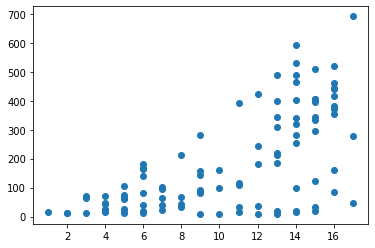

In [ ]:
plt.scatter(x = dataset['Mat'], y = dataset['2019_Runs'])
plt.show()

**`Plot for Number of Innings batted in 2018 vs runs scored in 2019`**

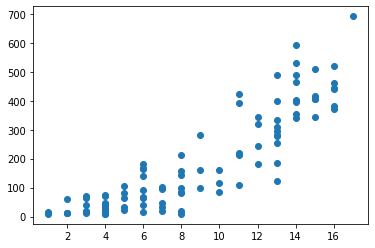

In [ ]:
plt.scatter(x = dataset['Inns'], y = dataset['2019_Runs'])
plt.show()

**`Not outs in IPL 2018 vs Runs scored in 2019`**

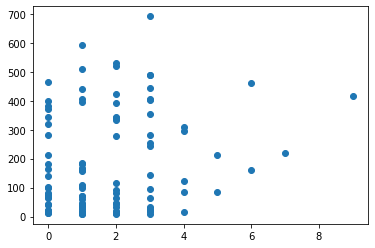

In [ ]:
plt.scatter(x = dataset['NO'], y = dataset['2019_Runs'])
plt.show()

**`Runs scored in 2018 vs Runs scored in 2019`**

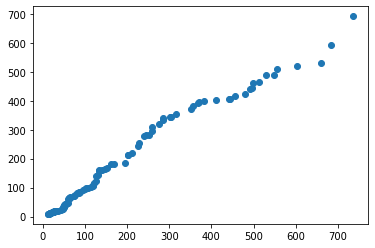

In [ ]:
plt.scatter(x = dataset['2018_Runs'], y = dataset['2019_Runs'])
plt.show()

**`Highest Score of each player in 2018 vs Runs Scored in 2019`**

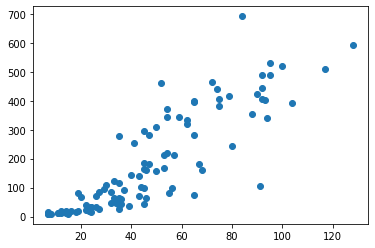

In [ ]:
plt.scatter(x = dataset['HS'], y = dataset['2019_Runs'])
plt.show()

**`Batting Average in IPL 2018 vs Runs Scored in 2019`**

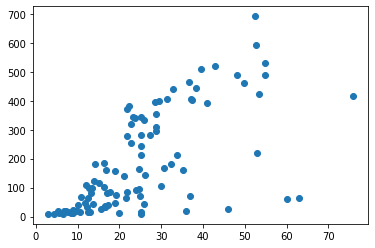

In [ ]:
plt.scatter(x = dataset['Avg'], y = dataset['2019_Runs'])
plt.show()

**`Total Balls faced in the tournament vs Runs scored in 2019`**

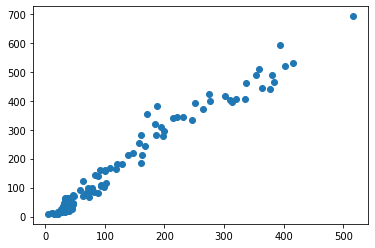

In [ ]:
plt.scatter(x = dataset['BF'], y = dataset['2019_Runs'])
plt.show()

**`Strike Rate vs Runs in IPL 2019`**

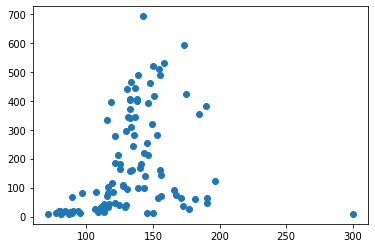

In [ ]:
plt.scatter(x = dataset['SR'], y = dataset['2019_Runs'])
plt.show()

**`Number of centuries in IPL 2018 vs Runs in IPL 2019`**

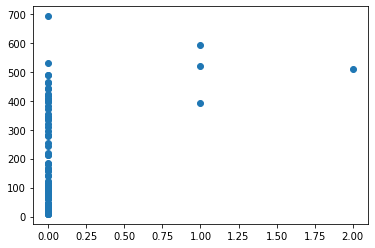

In [ ]:
plt.scatter(x = dataset[100], y = dataset['2019_Runs'])
plt.show()

**`Number of half centuries in IPL 2018 vs Runs in IPL 2019`**

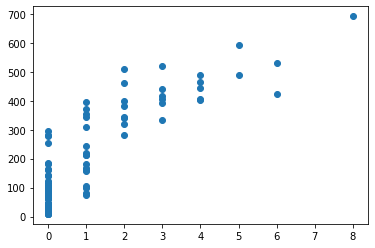

In [ ]:
plt.scatter(x = dataset[50], y = dataset['2019_Runs'])
plt.show()

**`Number of 4s in IPL 2018 vs Runs in IPL 2019`**

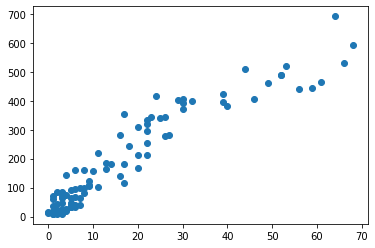

In [ ]:
plt.scatter(x = dataset['4s'], y = dataset['2019_Runs'])
plt.show()

**`Number of 6s in IPL 2018 vs Runs in IPL 2019`**

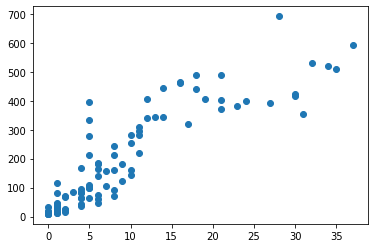

In [ ]:
plt.scatter(x = dataset['6s'], y = dataset['2019_Runs'])
plt.show()

**`Splitting data into training and validation`**

In [ ]:
X = dataset.iloc[ :, 1:-1].values
Y = dataset.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_Train, X_Valid, Y_Train, Y_Valid = train_test_split(X, Y, test_size = 0.2, random_state = 0)

**`Applying Standard Scaler to ensure the data is normally distributed within each feature.`**

In [ ]:
from sklearn.preprocessing import StandardScaler
ss_train = StandardScaler()
ss_valid = StandardScaler()

X_Train = ss_train.fit_transform(X_Train)
X_Valid = ss_valid.fit_transform(X_Valid)

**`Using Gradient Boosting Regressor with n_estimators equal to 55 to avoid overfitting`**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor(loss = 'huber', n_estimators = 55, random_state = 0)
regressor.fit(X_Train, Y_Train)
pred_train = regressor.predict(X_Train)

**`Plotting residual values to observe the accuracy of the prediction against training data`**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


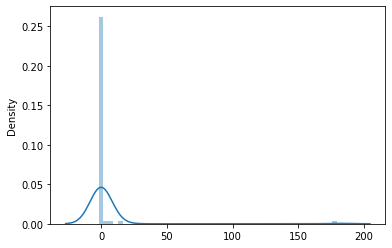

In [ ]:
residuals_train = Y_Train - pred_train
sns.distplot(residuals_train)

In [ ]:
rms = round(np.sqrt(np.mean(np.power((np.array(Y_Train)-np.array(pred_train)),2))), 3)
print('Root Mean Sqaure =',rms)
ms = round(np.sum(np.power((np.array(Y_Train)-np.array(pred_train)), 2))/len(Y_Train), 3)
print('Mean Square =',ms)

Root Mean Sqaure = 20.155
Mean Square = 406.24


**`Plotting residual values to observe the accuracy of the prediction against validation data`**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


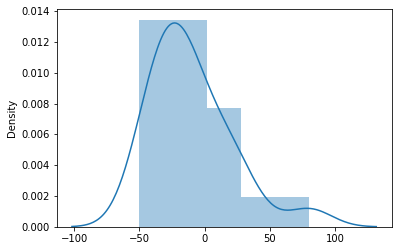

In [ ]:
pred_valid = regressor.predict(X_Valid)
residuals_valid = Y_Valid - pred_valid
sns.distplot(residuals_valid)

In [ ]:
rms_valid = round(np.sqrt(np.mean(np.power((np.array(Y_Valid) - np.array(pred_valid)), 2))), 3)
print('Root Mean Sqaure =',rms_valid)
ms_valid = round(np.sum(np.power((np.array(Y_Valid) - np.array(pred_valid)), 2)) / len(Y_Valid), 3)
print('Mean Sqaure =',ms_valid)

Root Mean Sqaure = 32.132
Mean Sqaure = 1032.49


**`Visualizing prediction of training data against training data`**

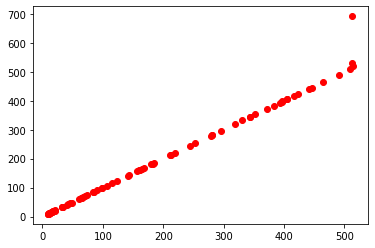

In [ ]:
plt.scatter(x = pred_train, y = Y_Train, color = 'red')
plt.show()

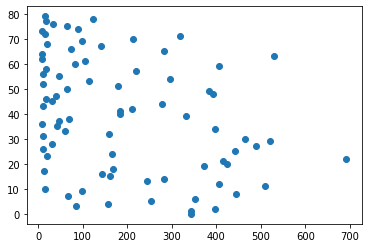

In [ ]:
length = [i for i in range(len(Y_Train))]
plt.scatter(x = Y_Train, y = length)
plt.show()

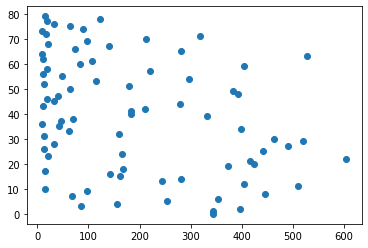

In [ ]:
length = [i for i in range(len(Y_Train))]
plt.scatter(x = pred_train, y = length)
plt.show()

**`Reading test dataset`**

In [ ]:
test_dataset = pd.read_excel("Data.xlsx", "Test_Data")
test_dataset.head()

,PLAYER,Mat,Inns,NO,2019_Runs,HS,Avg,BF,SR,100,50,4s,6s
0,David Warner,12,12,2,692,100*,69.2,481,143.86,1,8,57,21
1,KL Rahul,14,14,3,593,100*,53.9,438,135.38,1,6,49,25
2,Quinton de Kock,16,16,1,529,81,35.26,398,132.91,0,4,45,25
3,Shikhar Dhawan,16,16,1,521,97*,34.73,384,135.67,0,5,64,11
4,Andre Russell,14,13,4,510,80*,56.66,249,204.81,0,4,31,52


**`Data preprocessing for High Score and Average values.`**

In [ ]:
high_score = []
for index in range(len(test_dataset['HS'])):
    if type(test_dataset['HS'][index]) == str:
        high_score.append(test_dataset['HS'][index].strip("*"))
    else:
        high_score.append(test_dataset['HS'][index])

average = []
for index in range(len(test_dataset['Avg'])):
    if type(test_dataset['Avg'][index]) == str:
        average.append(np.nan)
    else:
        average.append(test_dataset['Avg'][index])

test_dataset['HS'] = high_score
test_dataset['Avg'] = average
test_dataset = test_dataset.fillna(test_dataset.mean())

In [ ]:
type(test_dataset['HS'][1])

str

In [ ]:
X_Test = test_dataset.iloc[ :, 1:].values
names = test_dataset['PLAYER']

**`Applying Standard Scaler to ensure the data is normally distributed within each feature.`**

In [ ]:
from sklearn.preprocessing import StandardScaler
ss_test = StandardScaler()

X_Test = ss_train.fit_transform(X_Test)

**`Predicting Total Runs Scored in 2020 by players in the Test Data and Saving their scores against their names the final output file.`**

In [ ]:
pred_test =regressor.predict(X_Test)
output_data = {'PLAYER': names,'Predicted 2020 Runs': pred_test}
output = pd.DataFrame(data = output_data)
output.to_csv("2020_Runs.csv")
output.head()            

,PLAYER,Predicted 2020 Runs
0,David Warner,512.872834
1,KL Rahul,512.660476
2,Quinton de Kock,496.933807
3,Shikhar Dhawan,489.632245
4,Andre Russell,446.210215
